### 목표
- 붓꽃의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특징을 활용해 3가지 품정을 분류해보자
- KNN 모델의 이웃의 숫자를 조절해보자 (하이퍼 파라미터 튜닝 or 조정)

In [3]:
# 사이킷런에서 제공하는 데이터 세트를 생성하기
from sklearn.datasets import load_iris
iris_data = load_iris() #딕셔너리처럼 생겼지만 여기서는 "Bunch 클래스 객체" (딕셔너리와 유사함)
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# iris_data의 키 값 확인
iris_data.keys()
#data - 문제
#target - 품종(0-setosa 1-ver~ 2 - vir~)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# DESCR(describe의 약자) 키에는 데이터셋에 대한 설명이 들어있음
# petal : 꽃잎 / sepal : 꽃받침
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# target_names : 예측하고자 하는 붓꽃 품종의 이름을 문자열 배열로 가지고 있음
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# feature_names : 각 특성을 설명하는 문자열
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# 꽃잎의 길이, 너비, 꽃받침의 깊이, 너비
# data 키 값 (문제 데이터)
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# 답 데이터
# target 키 값
# 0 은 setosa / 1은 versicolor / 2는 virginica
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 데이터 셋 구성하기
- 문제와 답으로 분리
- 훈련세트와 평가세트로 분리
    - 훈련세트/훈련데이터/train 데이터 : 머신러닝 모델을 학습할 때 사용
    - 평가세트/평가데이터/홀드아웃 세트 : 모델이 얼마나 잘 작동하는지 측정하는 데 사용

In [11]:
# pandas 라이브러리
import pandas as pd

In [15]:
# 문제데이터 생성 -> 데이터프레임 형태로 생성
# 문제 의 키 값 : data
# data 키값을 활용해서 데이터프레임 생성
# columns 값은 feature_names 활용
# iris_data['data'] -> numpy의 ndarray 형태 -> 데이터프레임으로 변환 가능
# pd.DataFrame( 데이터 , columns = )
iris_df = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# 문제와 답 데이터로 분리
# 문제데이터는 대문자 X 에 담아주기 (2차원)
# 답데이터는 소문자 y에 담아주기 (1차원)

X = iris_df
y = iris_data['target']

In [22]:
from sklearn.model_selection import train_test_split
# 훈련세트와 평가세트로 분리하기 (여기서는 정렬이 되어있어서 7:3으로 순서대로 나누면안됨)
# train_test_split 함수 : 훈련세트와 테스트세트를 분리해주는 기능 (무작위로 섞어줌)
# 데이터를 나누기 전에 데이터셋을 무작위로 섞어준다. ( 데이터가 정렬되어있을 수 있으니까)

# random_state : 함수를 여러번 실행해도 결과가 똑같이 나온다. ( 다른사람들도 같음 )
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=65)
# 순서대로 넣어줘야함
# test_size 는 기본값이 0.25(?) 로 안적어주면 기본값


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
129,7.2,3.0,5.8,1.6
83,6.0,2.7,5.1,1.6
19,5.1,3.8,1.5,0.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
40,5.0,3.5,1.3,0.3
63,6.1,2.9,4.7,1.4
117,7.7,3.8,6.7,2.2


In [27]:
# X_train, X_test, y_train, y_test 의 크기 , 모양 = shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### EDA ( 데이터 살펴보기)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

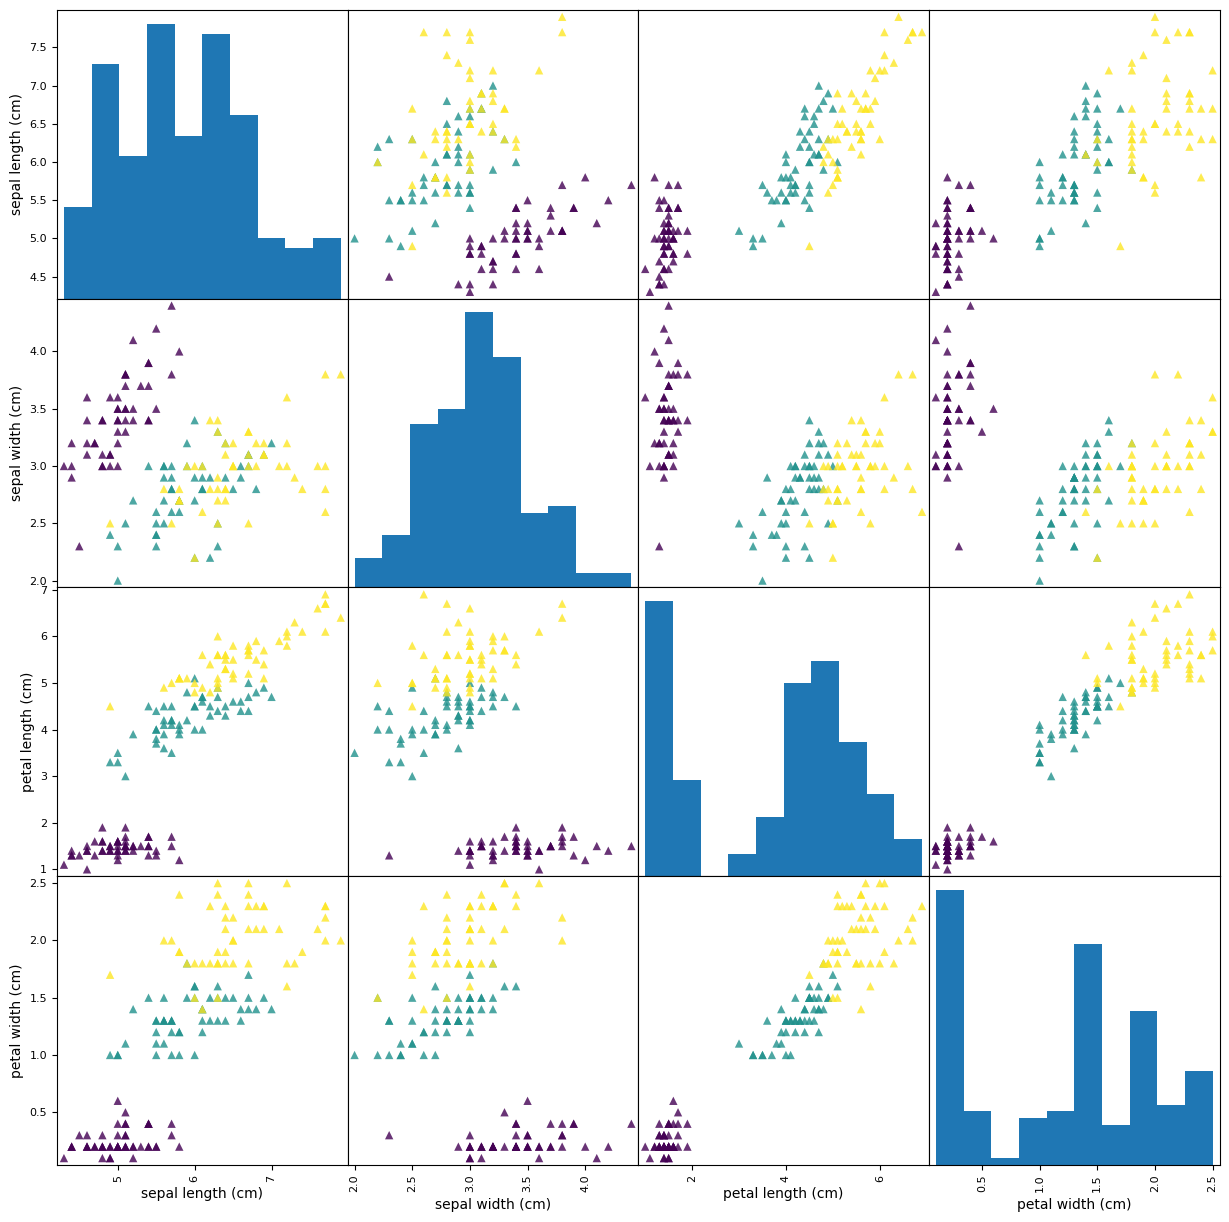

In [30]:
# pd.plotting.scatter_matrix 함수 : 데이터프레임 산점도 행렬 생성
pd.plotting.scatter_matrix (iris_df,
                                   figsize = (15,15), # figsize = 행렬의 크기
                                    marker = '^',  # marker = 그래프의 점의 모양
                                    c = y,  # c-color 산점도 그래프의 점의 색상 , 여기서 y는 클래스레이블(여기서는 0,1,2)
                                    alpha = 0.8) # alpha는 점의 투명도 1로 갈수록 불투명

- 새클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분됨
- 머신러닝모델을 학습시키는데에 적합하다고 판단됨

### 모델링 작업

In [31]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 평가하는 함수 불러오기
from sklearn import metrics

# 모델 이름 - KNeighborsClassifier
# 모델 생성 - knn이라는 변수에 담아주기
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model


KNeighborsClassifier(n_neighbors=10)

In [32]:
# 모델 학습 - fit() 메소드 사용
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
# 예측하기 - predict() 메소드 사용
pre = knn_model.predict(X_test)
pre

array([1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       0])

In [35]:
# 평가 - metrics 함수 사용
metrics.accuracy_score(pre,y_test)

0.9555555555555556

### 하이퍼파라미터 튜닝
- 지금까지 배운 n_neighbors 값을 조정해보면서 튜닝

In [60]:
test_list = []
train_list = []

for k in range(1,105):
    # 모델생성
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 모델학습
    knn_model.fit(X_train, y_train)
    # test 예측  
    pre = knn_model.predict(X_test)
    # test 평가( 함수 - metrics.accuracy_score(예측값, 실제 결과값))
    res = metrics.accuracy_score(pre, y_test)
    # test_list 라는 리스트에 결과값을 저장
    test_list.append(round(res,2))  # round(값, 소수점자리수) -> 값을 소수점 자리수까지 반올림
    
    # train 예측
    pre2 = knn_model.predict(X_train)
    # train 평가
    res2 = metrics.accuracy_score(pre2, y_train)
    # 평가값을 train_list 결과값을 저장
    train_list.append(round(res2,2))
    
print('Test : ' , test_list)
print('Train : ' , train_list)
    



# 아래 코드는 max가 몇번째 인덱스 인지 알아보는 코드
# cnt=0
# cnt_list=[]
# num = max(test_list)
# for i in test_list :
#     cnt+=1
#     if num == i :
#         cnt_list.append(cnt)
# print(cnt_list)


Test :  [0.93, 0.96, 0.93, 0.93, 0.91, 0.96, 0.98, 0.96, 0.98, 0.96, 0.96, 0.96, 0.98, 0.93, 0.91, 0.93, 0.93, 0.96, 0.93, 0.93, 0.93, 0.91, 0.93, 0.91, 0.89, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.89, 0.87, 0.89, 0.87, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.87, 0.87, 0.87, 0.87, 0.87, 0.89, 0.89, 0.89, 0.89, 0.89, 0.87, 0.89, 0.87, 0.87, 0.87, 0.89, 0.89, 0.89, 0.91, 0.89, 0.89, 0.91, 0.89, 0.87, 0.87, 0.87, 0.67, 0.42, 0.36, 0.36, 0.36, 0.33, 0.33, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31]
Train :  [1.0, 0.96, 0.97, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.96, 0.97, 0.97, 0.97, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.95, 0.96, 0.95, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.96, 0.97, 0.95, 0.94, 0.95, 0.95, 0.96, 0.96, 0.95, 0.94, 0.93, 0.94, 0.92, 0.93, 0.92, 0.93, 0.91, 0.92, 0.92, 0.9, 0.9, 0.9, 0.9, 0.92, 0.9, 0.9, 0.9, 0.9, 

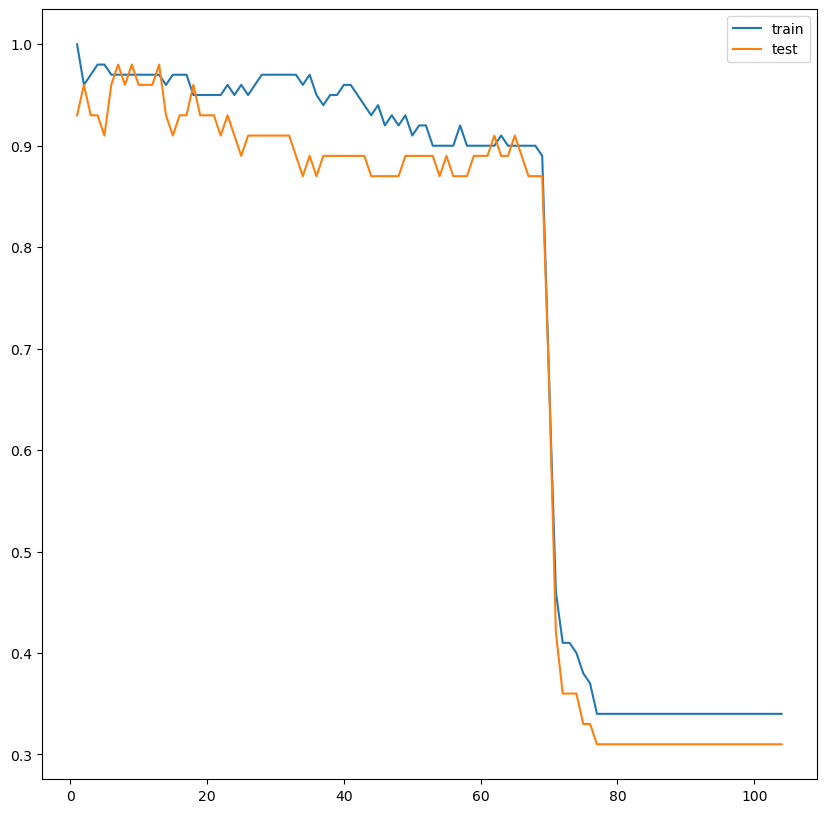

In [72]:
# 훈련용/테스트 결과 시각화하기
# 시각화도구 라이브러리 불러오기
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
# plot(x축범위, y축범위)
plt.plot(range(1,105), train_list , label = 'train')# label 값 달아주기
# test_list 그래프 그리기
plt.plot(range(1,105), test_list, label = 'test')

# 범례 표시
plt.legend()

# 혹은 다른 방법 범례 표시 
# plt.plot(range(1,105), train_list)
# plt.plot(range(1,105), test_list)
# plt.legend('train_list', 'test_list')

plt.show()